# Project - Fairness in AI

Name : Sherlyn Angelina Lee

Group : 1

LDD3 Magistère Informatique

## Introduction

The NIH Chest X-ray Dataset contains over 100,000 chest X-ray images from more than 30,000 patients, labeled with 14 different thoracic pathologies (e.g., pneumonia, cardiomegaly, effusion). Each image is accompanied by metadata, including patient age, gender, and disease labels.

### Problem Statement
In this project, I will be analyzing the metadata of a subset of 15,000 individuals, identify potential biases (e.g., age, gender, or disease distribution imbalances), and apply pre-processing techniques to reduce these biases.

### Objective
- Perform a descriptive analysis of the metadata to understand its structure and identify biases.
- Apply pre-processing techniques to mitigate the identified biases.
- Prepare a transformed dataset that is more balanced and suitable for training machine learning models.

### Anticipated Biases
- Age: Could certain age groups be over- or under-represented?
- Gender: Could there be differences in the way certain diseases are diagnosed based on gender?
- Disease Prevalence: Are some diseases more common in certain demographic groups?

In [ ]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


# Dataset
df = pd.read_csv("LEE_SHERLYN_ANGELINA.csv",
                       header = 0, sep = ",")

## Descriptive Analysis

### Data Exploration

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.shape

(54261, 12)

There are 54,261 rows (images) and 12 columns in the DataFrame.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54261 entries, 0 to 54260
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Image Index                  54261 non-null  object 
 1   Finding Labels               54261 non-null  object 
 2   Follow-up #                  54261 non-null  int64  
 3   Patient ID                   54261 non-null  int64  
 4   Patient Age                  54261 non-null  int64  
 5   Patient Gender               54261 non-null  object 
 6   View Position                54261 non-null  object 
 7   OriginalImage[Width          54261 non-null  int64  
 8   Height]                      54261 non-null  int64  
 9   OriginalImagePixelSpacing[x  54261 non-null  float64
 10  y]                           54261 non-null  float64
 11  Unnamed: 11                  0 non-null      float64
dtypes: float64(3), int64(5), object(4)
memory usage: 5.0+ MB


In [ ]:
df.describe()

,Follow-up #,Patient ID,Patient Age,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
count,54261.000000,54261.000000,54261.000000,54261.000000,54261.000000,54261.000000,54261.000000,0.0
mean,9.026925,14307.511141,46.660014,2649.492287,2490.277934,0.155468,0.155468,NaN
std,17.149694,8382.894477,17.043207,340.916279,401.681470,0.016082,0.016082,NaN
min,0.000000,2.000000,1.000000,1143.000000,966.000000,0.115000,0.115000,NaN
25%,0.000000,7317.000000,34.000000,2500.000000,2048.000000,0.143000,0.143000,NaN
50%,3.000000,14112.000000,49.000000,2534.000000,2544.000000,0.143000,0.143000,NaN
75%,10.000000,20482.000000,59.000000,2992.000000,2991.000000,0.168000,0.168000,NaN
max,183.000000,30805.000000,414.000000,3827.000000,3567.000000,0.198800,0.198800,NaN


Observations:
- Patient Age: The mean age is 46.7, but the maximum age is 414! This is clearly an error and needs to be addressed.
- Follow-up #: The follow-up numbers vary widely (0 to 183), suggesting some patients have many follow-up images while others have very few.

In [ ]:
df.isnull().sum()

,0
Image Index,0
Finding Labels,0
Follow-up #,0
Patient ID,0
Patient Age,0
Patient Gender,0
View Position,0
OriginalImage[Width,0
Height],0
OriginalImagePixelSpacing[x,0


The only column with NaN values is the Unnamed: 11.

## Data cleaning

#### Relevant Columns:
* Patient Age: Age of the patient.
* Patient Gender: Gender of the patient (M/F).
* Finding Labels: Diagnosis or findings (e.g., "No Finding", "Cardiomegaly").
* Follow-up #: Number of follow-up visits.
* View Position: Position of the X-ray (e.g., PA, AP).

#### Irrelevant Columns:
Image Index, Patient ID, OriginalImage[Width, Height], OriginalImagePixelSpacing[x, y], Unnamed: 11.

In [ ]:
label = 'Finding Labels'

### Handle outliers

Potentiel Outliers:
- Age
- Follow-up

As mentioned above, the Patient Age column has a maximum value of 414, which is impossible. Let's investigate this.


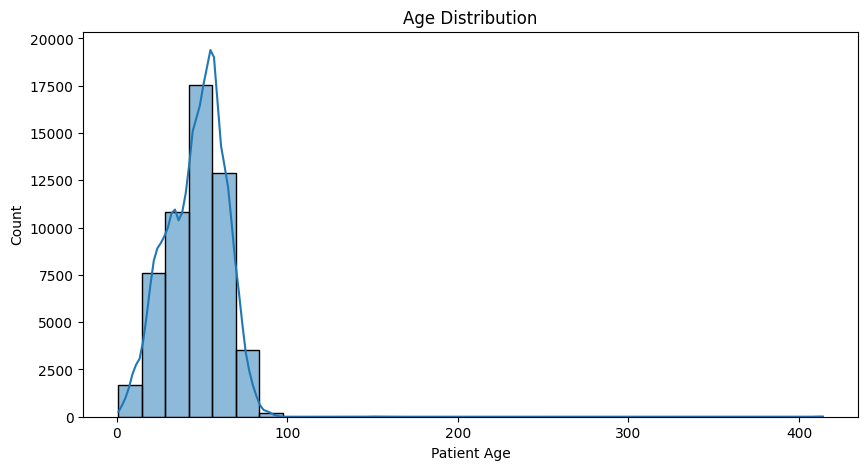

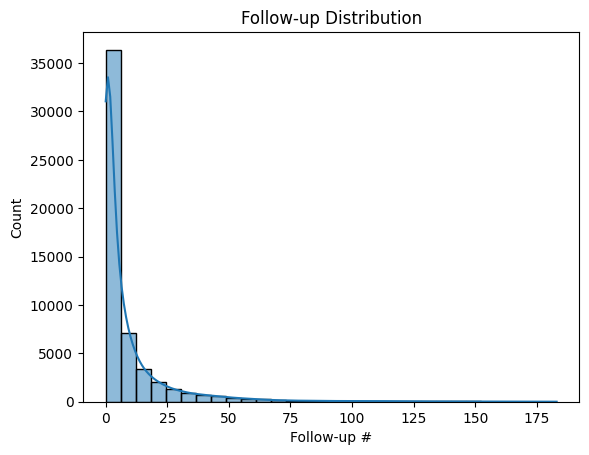

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df['Patient Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

sns.histplot(df['Follow-up #'], bins=30, kde=True)
plt.title("Follow-up Distribution")
plt.show()

Resolution:

Having noticed some outliers in the age distribution graph, I am now going to identify all rows where Patient Age is greater than the general maximum age, which is 116, according to Google. Then, I will check if these patients have another age recorded in the original dataframe. Lastly, I will be replacing the invalid ages with the oldest but valid age of the patient.

In [ ]:
patients_age_outlier = df[df['Patient Age'] >= 116] # According to Google, the oldest age a person has ever lived to is 116
patients_age_outlier

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
10272,00005567_000.png,Effusion|Pneumonia,0,5567,412,M,AP,3056,2544,0.139,0.139,NaN
22709,00011973_002.png,Edema,2,11973,414,M,AP,3056,2544,0.139,0.139,NaN
26750,00013950_000.png,No Finding,0,13950,148,M,PA,2964,2939,0.143,0.143,NaN
28080,00014520_026.png,Infiltration|Mass,26,14520,150,M,PA,2992,2991,0.143,0.143,NaN
30172,00015558_000.png,No Finding,0,15558,149,M,PA,2992,2991,0.143,0.143,NaN
38401,00019346_000.png,Infiltration,0,19346,151,F,PA,2678,2774,0.143,0.143,NaN
41325,00020900_002.png,No Finding,2,20900,411,M,AP,3056,2544,0.139,0.139,NaN
41994,00021275_003.png,No Finding,3,21275,413,F,AP,3056,2544,0.139,0.139,NaN
44385,00022811_000.png,No Finding,0,22811,412,M,PA,3056,2544,0.139,0.139,NaN
46488,00025206_000.png,Infiltration|Mass,0,25206,153,M,PA,2992,2991,0.143,0.143,NaN


In [ ]:
outlier_patient_ids = patients_age_outlier['Patient ID'].unique()

# Check if these patients have another age recorded in the original dataframe
for patient_id in outlier_patient_ids:
  patient_ages = df[df['Patient ID'] == patient_id]['Patient Age'].unique()
  if len(patient_ages) > 1:
    print(f"Patient ID {patient_id} has multiple age entries: {patient_ages}")
  elif len(patient_ages) == 1 and patient_ages[0] >=116:
    print(f"Patient ID {patient_id} has only one age entry which is considered an outlier: {patient_ages}")
  else:
    print(f"Patient ID {patient_id} has only one age entry: {patient_ages}")

Patient ID 5567 has multiple age entries: [412  53  54  57  44  47  48  49  50  51  52]
Patient ID 11973 has multiple age entries: [ 65 414  58  59  60  61  62  63]
Patient ID 13950 has multiple age entries: [148  64  65]
Patient ID 14520 has multiple age entries: [ 32  33 150]
Patient ID 15558 has multiple age entries: [149  46]
Patient ID 19346 has only one age entry which is considered an outlier: [151]
Patient ID 20900 has multiple age entries: [ 72 411  70  71]
Patient ID 21275 has multiple age entries: [ 21 413  22  19]
Patient ID 22811 has multiple age entries: [412  25]
Patient ID 25206 has multiple age entries: [153  36]
Patient ID 26028 has multiple age entries: [ 60 154]


We can assume that excluding the outlier values, the actual age of the Patient is actually the oldest one because the staff probably forgot to delete the old information.

In [ ]:
def get_actual_age(patient_id):
  """
  Finds the maximum age for a given patient ID, excluding outliers (ages >= 116).

  Args:
      patient_id: The ID of the patient.

  Returns:
      The maximum age for the patient (excluding outliers), or None if no valid age is found.
  """
  patient_data = df[df['Patient ID'] == patient_id]
  valid_ages = patient_data[patient_data['Patient Age'] < 116]['Patient Age']
  if not valid_ages.empty:
    return valid_ages.max()
  else:
    return None

for patient_id in outlier_patient_ids:
    actual_age = get_actual_age(patient_id)
    if actual_age is not None:
        # Replace the outlier ages
        df.loc[(df['Patient ID'] == patient_id) & (df['Patient Age'] >= 116), 'Patient Age'] = actual_age

In [ ]:
patients_age_outlier = df[df['Patient Age'] >= 116] # According to Google, the oldest age a person has ever lived to is 116
patients_age_outlier

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
38401,00019346_000.png,Infiltration,0,19346,151,F,PA,2678,2774,0.143,0.143,NaN


Since there are no multiple entries for this patient, we can just delete this row from our dataset since there's only one of them and we can't really deduce their age. Since there's only this one rown, this wouldn't impact our results too much.

In [ ]:
df = df[df['Patient ID'] != 19346]

In [ ]:
patients_age_outlier = df[df['Patient Age'] >= 116] # According to Google, the oldest age a person has ever lived to is 116
patients_age_outlier

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11


We have succesfully handled all outliers in the age column.

### Remove Unnecessary Columns

* The column Unnamed: 11 has no data (all NaN values). It should be dropped.
* Image Index is an identifier and not useful for analysis. It can be dropped unless needed for reference.
* Patient ID is also an identifier and can be dropped unless needed for tracking patients.
* OriginalImage[Width, Height], OriginalImagePixelSpacing[x, y] might not be relevant for metadata analysis.
* View Position

In [ ]:
df = df.drop(columns=['Unnamed: 11', 'Image Index', 'Patient ID', 'OriginalImage[Width', 'Height]', 'OriginalImagePixelSpacing[x', 'y]'])

From the exploration, there are no missing values in the relevant columns (Finding Labels, Patient Age, Patient Gender, etc.).

## Exploratory Data Analysis

In [ ]:
# Pearson correlation
def Compute_correlation(cola, colb):
  return np.corrcoef(df[cola].values, df[colb].values)[0][1]

To make it easier for now, we'll transform the Finding Labels column into a binary classification task.

In [ ]:
df['Finding Labels'] = df['Finding Labels'].apply(lambda x: 0 if x == 'No Finding' else 1)

### Analyze Numerical Features

In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Features:", numerical_cols)

Numerical Features: Index(['Finding Labels', 'Follow-up #', 'Patient Age'], dtype='object')


#### Univariate Analysis - Numerical

Display the distribution of the numerical features.

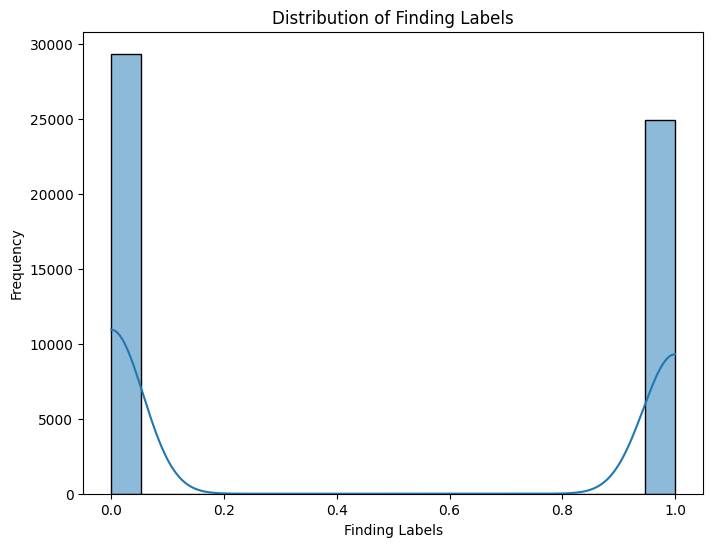

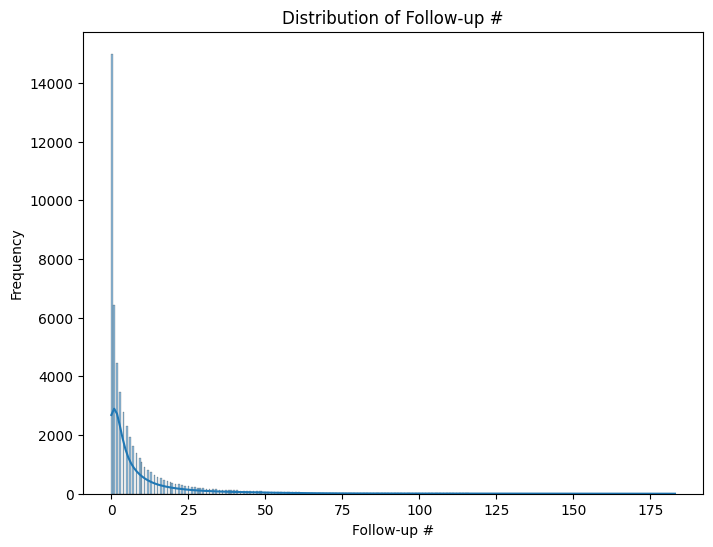

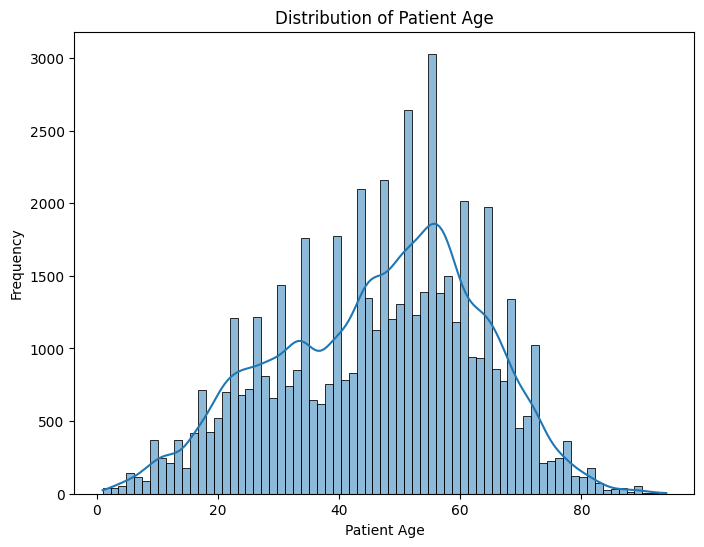

In [ ]:
# histrograms
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


Shape of the Distribution:
- Finding Labels
  * Shape of the distribution : bimodial distribution
  * Range of values : 0 to 1
  * Outliers : None
- Follow-up
  * Shape of the distribution : highly skewed to the right
  * Range of values : 0 to 183
  * Outliers : The points beyond 100 need to be investigated
- Age
  * Shape of the distribution : normal (unimodal)
  * Range of values : 0 to 116
  * Outliers : None


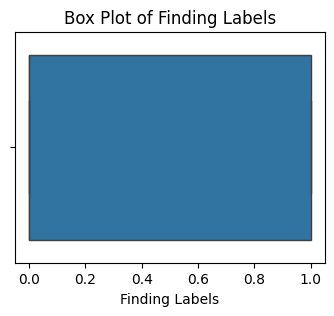

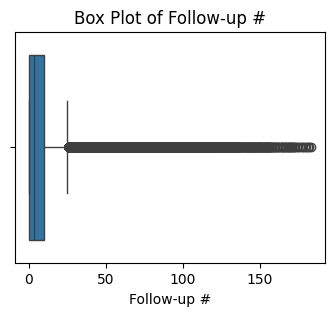

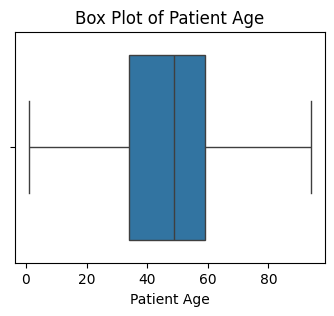

In [ ]:
# boxplots
for col in numerical_cols:
    plt.figure(figsize=(4, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

- Finding Labels
  - Not interesting (it was supposed to be a categorical but temporarily transformed into numerical)

- Follow-up
  - Median : low median value
  - IQR : small (majority of the data points are of low values)
  - Range and Whiskers : large range, there are high values
  - Outliers : numerous points lying beyond 1.5xIQR meaning positive skew

- Age
  - Median : around 45-55
  - IQR : 35-60 (meaning the middle 50% of patient ages are within this range)
  - Range and Whiskers : no outliers based on the 1.5xIQR rule
  - Shape : relatively symmetrical around median

  


#### Bivariate Analysis - Numerical

Compute their correlation with the target.

In [ ]:
numerical_features = list(df.select_dtypes(include=np.number).columns)
numerical_features

['Finding Labels', 'Follow-up #', 'Patient Age']

In [ ]:
for num_feature in numerical_features:
  print(num_feature, Compute_correlation(label, num_feature))

Finding Labels 0.9999999999999999
Follow-up # 0.17125356729163937
Patient Age 0.058984872697988196


Let's visualize it with a heatmap.

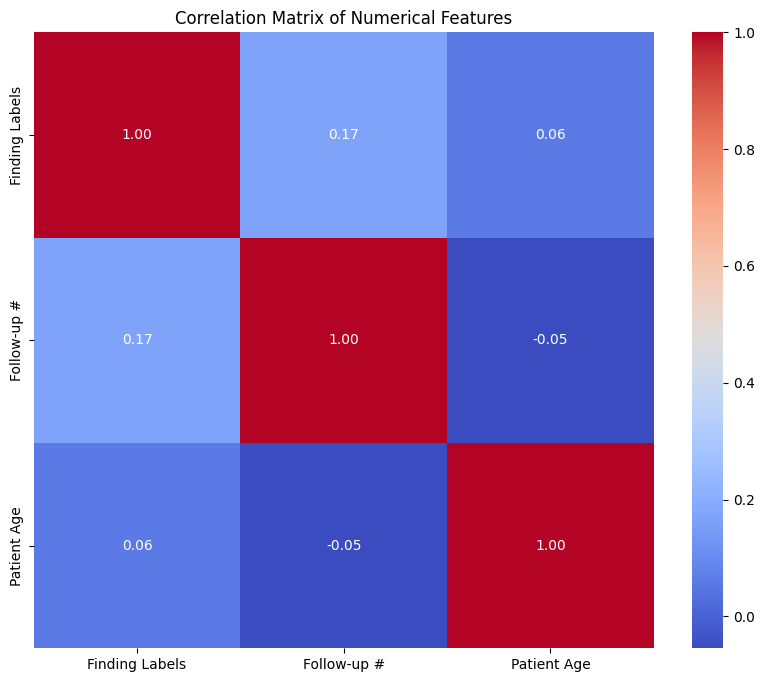

In [ ]:
correlation_matrix = df[numerical_features].corr()

# heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


We can conclude that since there is no correlation between the age and the label, there is no bias. But there is a little bit of correlation between the label and the Follow-up, so there might be a bias, but it's too low to be considered one for now. We cannot conclude for sure whether or not there is a bias between the two.

The above is Pearson correlation (linear). Seeing the weak positive linear correlation value above, I suspect they have non linear relationships. So now, let's take a look at its Spearson correlation (non-linear).

In [ ]:
def compute_spearman_correlation(cola, colb):
  return df[cola].corr(df[colb], method='spearman')

for num_feature in numerical_features:
  print(num_feature, compute_spearman_correlation(label, num_feature))

Finding Labels 1.0
Follow-up # 0.24354902019004232
Patient Age 0.06091247210782574


We observed the weak positive monotonic relaionship between "Follow-up #" and "Finding Labels", which means that as "Follow-up #" increases, "Finding Labels" tends to increase as well, but the relationship is not very reliable.

The correlation for "Patient Age" is so close to zero so there's no relationship between these variables.

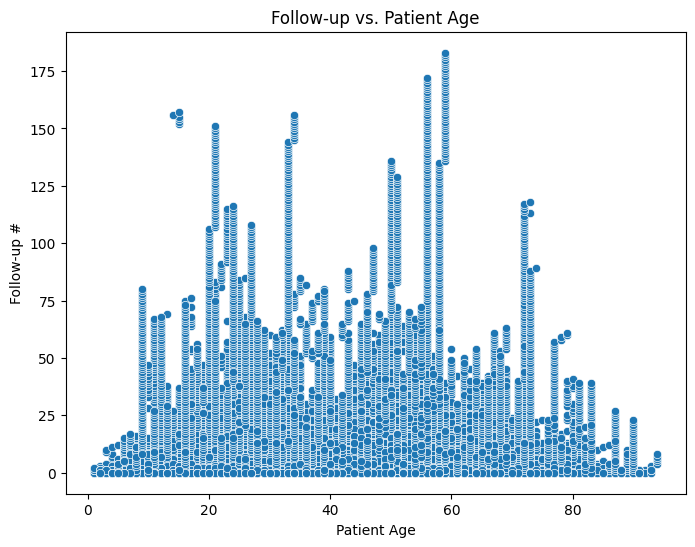

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Patient Age', y='Follow-up #', data=df)
plt.title('Follow-up vs. Patient Age')
plt.xlabel('Patient Age')
plt.ylabel('Follow-up #')
plt.show()


"Follow-up #" is not a continuous variable but rather takes on discrete or clustered values.

There's a higher density of points concentrated in the bottom-left corner of the plot, indicating that many patients, particularly younger ones, have low "Follow-up #" values.

There might be a very weak positive relationship between "Patient Age" and "Follow-up #," where older patients tend to have slightly higher "Follow-up #" values.




In [ ]:
print(df['Follow-up #'].dtype)

unique_followups = df['Follow-up #'].unique()
print(unique_followups)

int64
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183]


Since the dtype is int64 and there's a limited set of unique values (0-183), "Follow-up #" is a discrete variable.
Note: Discrete variables involve counting something.

### Analyze Categorical Features

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical Features:", categorical_cols)

Categorical Features: Index(['Patient Gender', 'View Position'], dtype='object')


#### Univariate Analysis - Categorical

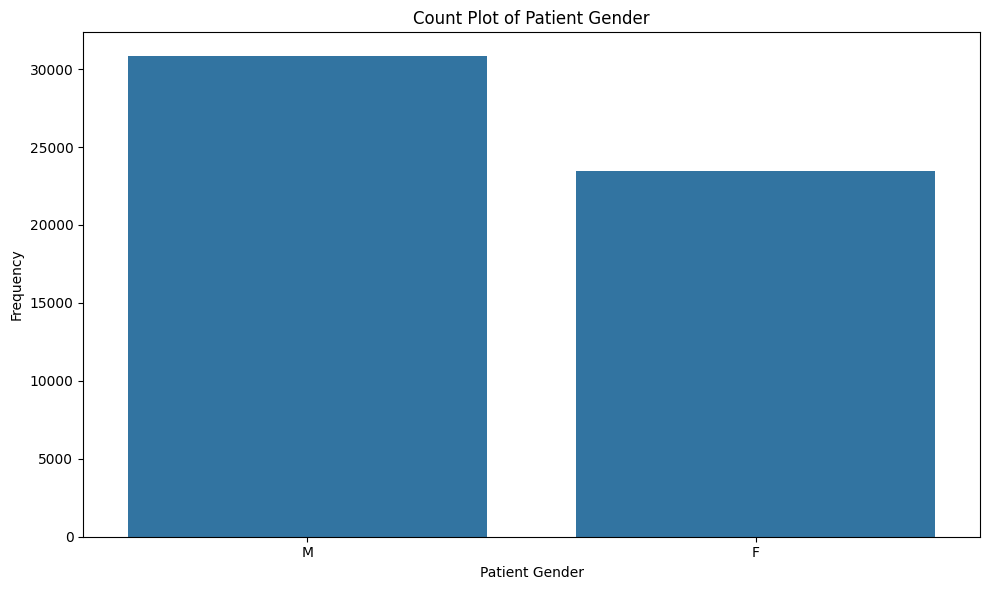

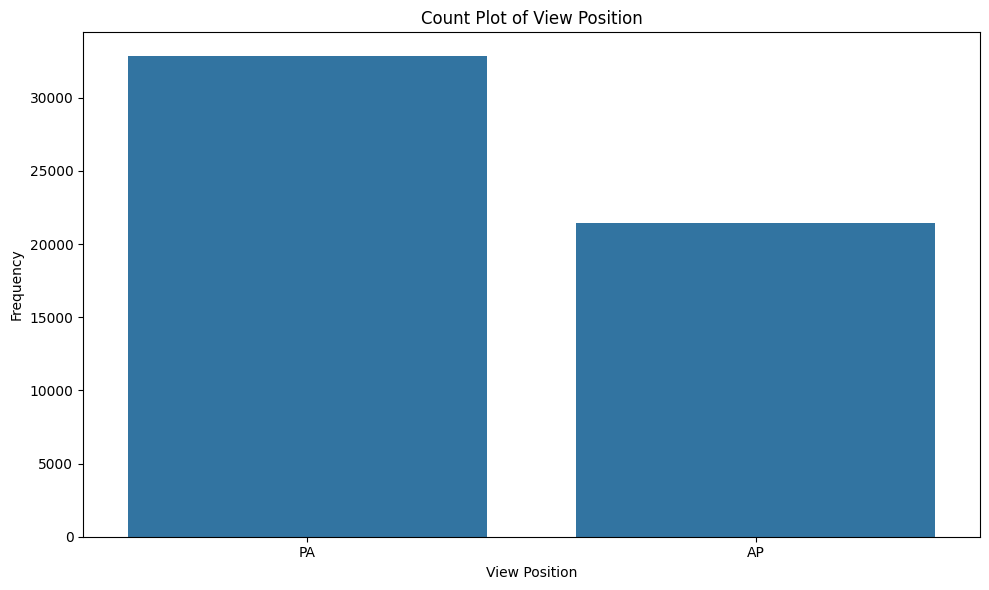

In [ ]:
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=df)
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

Potential Biases:
- The difference in counts between PA and AP suggests a potential bias in the data collection or selection process.
- The difference in counts between Male and Female patients suggests a potential gender bias in the dataset. The dataset appears to be skewed towards male patients.



In this project, our primary focus is on demographic biases (age, gender), so View Position might be less relevant. Let's drop it.



In [ ]:
df = df.drop(columns=['View Position'])

#### Bivariate Analysis - Categorical

In [ ]:
# turn the gender column into a numerical column temporarily to do correlation analysis
df['Patient Gender'] = df['Patient Gender'].apply(lambda x: 0 if x == 'F' else 1)

In [ ]:
Compute_correlation(label, 'Patient Gender')

0.004187858921644328

Here we can see that there is no correlation between Gender and Finding label.

In [ ]:
# turn the gender column back to categorical
df['Patient Gender'] = df['Patient Gender'].apply(lambda x: 'M' if x == 1 else 'F')

A normalized stacked bar chart would be much more informative for comparing distributions across categories.

In [ ]:
import plotly.express as px

def analyse_bi_quali_quali(quali1, quali2, df):
  if quali1==quali2:
    return
  # table de contingence
  if 'WEIGHT' not in df.columns:
    df['WEIGHT'] = 1
  df_group = df[[quali1, quali2, "WEIGHT"]].groupby([quali1,quali2]).sum().reset_index()
  df_group.rename(columns={"WEIGHT":"count"}, inplace=True)
  rows = list(set(df_group[quali2].values))
  cols = list(set(df_group[quali1].values))
  contingence_tab = [
      [ df_group[(df_group[quali2]==row) & (df_group[quali1]==col)]["count"].values[0] if col in df_group[df_group[quali2]==row][quali1].values else 0 for row in rows  ]
      for col in cols]
  contingence_img = px.imshow(contingence_tab,
                              text_auto=True,
                              labels=dict(x=quali2, y=quali1),
                              x=rows, y=cols)
  contingence_img.show()
  # normalized stacked bar
  quali1_count = df_group[[quali1, "count"]].groupby([quali1]).sum()
  df_group['count_quali1_prop'] = df_group[[quali1,"count"]].apply(lambda x: 100*x['count']/quali1_count.loc[x[quali1]], axis=1)
  bar1 = px.bar(df_group, x=quali1, y="count_quali1_prop", color=quali2, text_auto=True)
  bar1.show()
  quali2_count = df_group[[quali2, "count"]].groupby([quali2]).sum()
  df_group['count_quali2_prop'] = df_group[[quali2,"count"]].apply(lambda x: 100*x['count']/quali2_count.loc[x[quali2]], axis=1)
  bar2 = px.bar(df_group, x=quali2, y="count_quali2_prop", color=quali1, text_auto=True)
  bar2.show()



In [ ]:
analyse_bi_quali_quali('Patient Gender', 'Finding Labels', df)

Female:

- Total Females: 12724 + 10717 = 23441
- % with Finding Labels = 0: (12724 / 23441) * 100% ≈ 54.27%
- % with Finding Labels = 1: (10717 / 23441) * 100% ≈ 45.73%


Male:

- Total Males: 16599 + 14220 = 30819
- % with Finding Labels = 0: (16599 / 30819) * 100% ≈ 53.86%
- % with Finding Labels = 1: (14220 / 30819) * 100% ≈ 46.14%

Finding Labels = 0:
- % Male: (16,599 / 29,323) * 100% ≈ 56.61%
- % Female: (12,724 / 29,323) * 100% ≈ 43.39%

Finding Labels = 1:
- % Male: (14,220 / 24,937) * 100% ≈ 57.02%
- % Female: (10,717 / 24,937) * 100% ≈ 42.98%

The percentages are slightly different between males and females.  This suggests that there might be a little (but not much) association between gender and "Finding Labels."


The normalized stacked bar chart shows a broadly the same distribution of "Finding Labels" between male and female patients, although there are more male patients overall.

#### Numerical vs Categorical

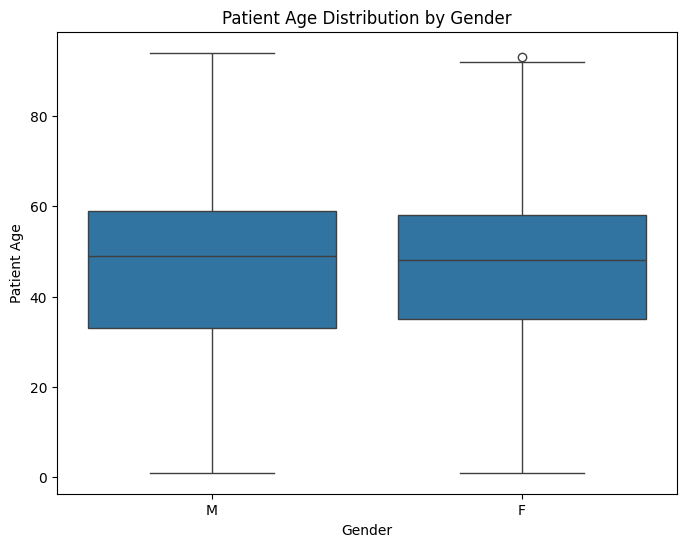

In [ ]:
# boxplots
plt.figure(figsize=(8, 6))
sns.boxplot(x='Patient Gender', y='Patient Age', data=df)
plt.title('Patient Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Patient Age')
plt.show()

The box plots suggest that the age distributions for male and female patients are quite similar in terms of median, spread, and skew.

There's a slightly higher median age for the group with diseases found.

### Reverting back
But let's take a look again at the  the original Finding Labels column with all the specific diagnoses for more detailed analysis.

Simplifying the problem into a binary classification discards information about the type of disease and hence resulting in loss of information regarding to biases related to specific diseases.

In [ ]:
df_revert = pd.read_csv("LEE_SHERLYN_ANGELINA.csv",
                       header = 0, sep = ",")

outlier_patient_ids = patients_age_outlier['Patient ID'].unique()

for patient_id in outlier_patient_ids:
    actual_age = get_actual_age(patient_id)
    if actual_age is not None:
        df_revert.loc[(df['Patient ID'] == patient_id) & (df_revert['Patient Age'] >= 116), 'Patient Age'] = actual_age

df_revert = df_revert[df_revert['Patient ID'] != 19346]
df_revert = df_revert.drop(columns=['View Position', 'Unnamed: 11', 'Image Index', 'Patient ID', 'OriginalImage[Width', 'Height]', 'OriginalImagePixelSpacing[x', 'y]'])

In [ ]:
df.head()

,Finding Labels,Follow-up #,Patient Age,Patient Gender,WEIGHT
0,0,0,81,M,1
1,0,0,81,M,1
2,0,0,82,M,1
3,1,0,69,F,1
4,0,1,70,F,1


In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

df_revert['Finding Labels'] = df_revert['Finding Labels'].apply(lambda x: x.split('|'))

# Use MultiLabelBinarizer to create binary columns
mlb = MultiLabelBinarizer()
df_labels = pd.DataFrame(mlb.fit_transform(df_revert['Finding Labels']), columns=mlb.classes_)

df_revert = pd.concat([df_revert, df_labels], axis=1)
df_revert = df_revert.drop(columns=['Finding Labels'])

df_revert.head()

,Follow-up #,Patient Age,Patient Gender,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,0.0,81.0,M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,81.0,M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,82.0,M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,69.0,F,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,70.0,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
for col in mlb.classes_:
  analyse_bi_quali_quali('Patient Gender', col, df_revert)

We observed that some of the proportions of patients for each diseases are slightly different in both genders:
Atelectasis, cardiomegaly, consolidation, edema, emphysema, fibrosis, hernia, mass, pleural_thickening, pneumonia, pneumothorax.

<ipython-input-40-edc0baf435f9>:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



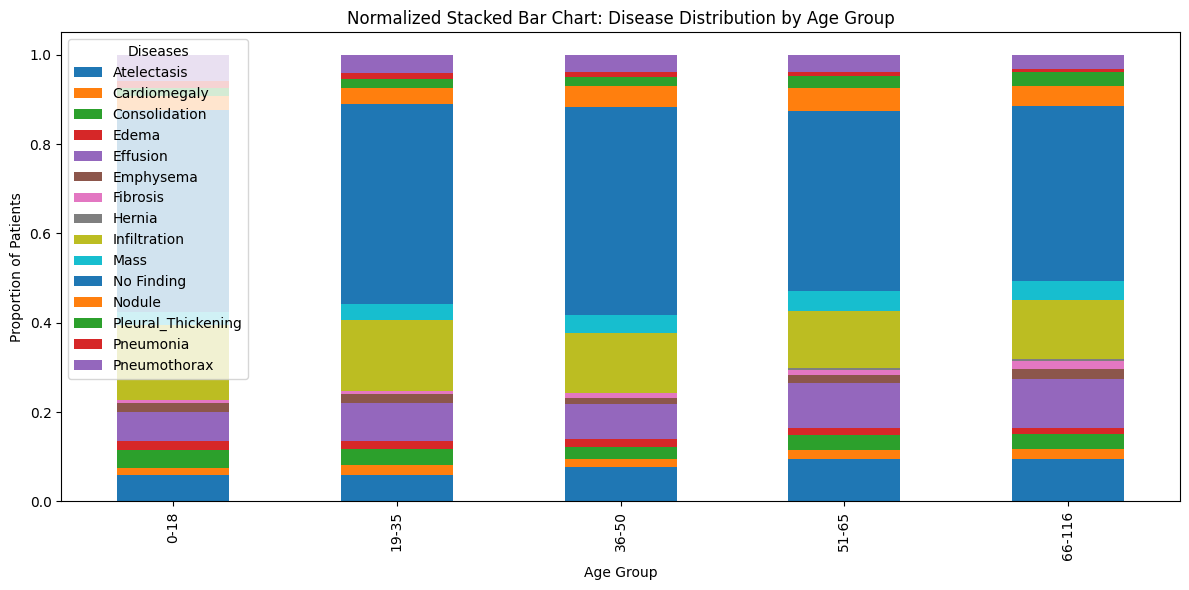

In [ ]:

bins = [0, 18, 35, 50, 65, 116]
labels = ['0-18', '19-35', '36-50', '51-65', '66-116']
df_revert['Age Group'] = pd.cut(df_revert['Patient Age'], bins=bins, labels=labels, right=False)

age_disease_counts = df_revert.groupby('Age Group')[df_labels.columns].sum()
age_disease_proportions = age_disease_counts.div(age_disease_counts.sum(axis=1), axis=0)

age_disease_proportions.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Normalized Stacked Bar Chart: Disease Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion of Patients')
plt.legend(title='Diseases')
plt.tight_layout()
plt.show()

Similarly, we observed that the proportion of patients for each diseases is slightly different between age groups.

Bias identified:
1. Gender Bias in the Prevalence of Specific Diseases
- More in Males:
Atelectasis
Mass
Pleural_Thickening
Consolidation
Infiltration
- More in Females:
Pneumothorax
Cardiomegaly
2. Gender Imbalance

## Bias Correction

For the pre-processing, I will proceed with the "Finding Labels" (Binary: Finding (1) / No Finding (0)) dataset because my goal is to address biases related  the overall presence or absence of any disease detectable by chest X-ray, regardless of the specific disease.

### Data pre-processing

In [ ]:
!pip install aif360

In [ ]:
print(df['Patient Gender'].value_counts())

Patient Gender
M    30819
F    23441
Name: count, dtype: int64


In [ ]:
print(df['Finding Labels'].value_counts())

Finding Labels
0    29323
1    24937
Name: count, dtype: int64


First, let's resolve the gender imbalance.

In [ ]:
df.drop(columns='WEIGHT')

,Finding Labels,Follow-up #,Patient Age,Patient Gender
0,0,0,81,M
1,0,0,81,M
2,0,0,82,M
3,1,0,69,F
4,0,1,70,F
...,...,...,...,...
54256,0,0,34,F
54257,0,0,39,M
54258,1,1,39,M
54259,0,0,30,F


In [ ]:
from imblearn.over_sampling import SMOTE
import aif360

df['Patient Gender'] = df['Patient Gender'].apply(lambda x: 0 if x == 'F' else 1)

X = df.drop(columns=['Finding Labels'])
y = df['Finding Labels']

# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

df_balanced = pd.concat([X_resampled, pd.Series(y_resampled, name='Finding Labels')], axis=1)

print(df_balanced['Patient Gender'].value_counts())

Patient Gender
1    33257
0    25389
Name: count, dtype: int64


Now we can move on and create a StandardDataset object and apply the first pre-processing method: Reweighing.

The attributes that I want to protect against discrimination or bias: Patient Gender, Age Group

Privileged groups :
- Male : In most societies, women have historically faced systemic disadvantages in healthcare
- Old Individuals : Young Children and adolescents are generally considered a more vulnerable population in healthcare settings.

In [ ]:
df_balanced.head()

,Follow-up #,Patient Age,Patient Gender,WEIGHT,Finding Labels
0,0,81,1,1,0
1,0,81,1,1,0
2,0,82,1,1,0
3,0,69,0,1,1
4,1,70,0,1,0


In [ ]:
from aif360.datasets import StandardDataset
from aif360.algorithms.preprocessing import Reweighing
from aif360.metrics import BinaryLabelDatasetMetric


bins = [0, 18, 116]
labels = ['0-18', '19-116']
df_balanced['Age Group'] = pd.cut(df_balanced['Patient Age'], bins=bins, labels=labels, right=False)

# age group to numerical values
age_group_mapping = {label: i for i, label in enumerate(labels)}
df_balanced['Age Group'] = df_balanced['Age Group'].map(age_group_mapping)

df_balanced['Age Group'] = df_balanced['Age Group'].astype(int)

PROTECTED_ATTRIBUTES = ['Patient Gender', 'Age Group']
PRIVILEGED_GROUPS = [[1], [1]]  # Male and Older Individuals (19-116)
UNPRIVILEGED_GROUPS = [[0], [0]]  # Female and Young Individuals (0-18)


#  AIF360 StandardDataset
dataset = StandardDataset(
    df=df_balanced,
    label_name="Finding Labels",
    favorable_classes=[1],
    protected_attribute_names=PROTECTED_ATTRIBUTES,
    privileged_classes=PRIVILEGED_GROUPS,
    categorical_features=[],
    instance_weights_name=None,
)

# Reweighing
RW = Reweighing(
    unprivileged_groups=[{PROTECTED_ATTRIBUTES[0]: UNPRIVILEGED_GROUPS[0][0], PROTECTED_ATTRIBUTES[1]: UNPRIVILEGED_GROUPS[1][0]}],
    privileged_groups=[{PROTECTED_ATTRIBUTES[0]: PRIVILEGED_GROUPS[0][0], PROTECTED_ATTRIBUTES[1]: PRIVILEGED_GROUPS[1][0]}]
)
RW.fit(dataset)
dataset_transf_train = RW.transform(dataset)

instance_weights = dataset_transf_train.instance_weights
print(instance_weights)

pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'
pip install 'aif360[inFairness]'
pip install 'aif360[Reductions]'


[1.00494736 1.00494736 1.00494736 ... 0.99510112 0.99510112 0.99510112]


In [ ]:
# Analyze instance weights
print("Min Weight:", instance_weights.min())
print("Max Weight:", instance_weights.max())
print("Mean Weight:", instance_weights.mean())

Min Weight: 0.9281524926686217
Max Weight: 1.0839041095890412
Mean Weight: 1.0000000000000002


- The minimum weight is approximately 0.925, and the maximum weight is approximately 1.09. This means that the weights are very close to 1.
-  The mean weight is 1.0.

The Reweighing algorithm has made  small adjustments to the instance weights. The resulting weights suggest that the dataset is now more balanced, with no significant over or underrepresentation of any particular group.

Let's take a look at its Fairness Metrics.

In [ ]:
metric_orig_train = BinaryLabelDatasetMetric(dataset,
                                             unprivileged_groups=[{PROTECTED_ATTRIBUTES[0]: UNPRIVILEGED_GROUPS[0][0], PROTECTED_ATTRIBUTES[1]: UNPRIVILEGED_GROUPS[1][0]}], # Combine protected groups
                                             privileged_groups=[{PROTECTED_ATTRIBUTES[0]: PRIVILEGED_GROUPS[0][0], PROTECTED_ATTRIBUTES[1]: PRIVILEGED_GROUPS[1][0]}]) #Combine privileged groups
print("Original Dataset Before Reweighing - Disparate Impact:", metric_orig_train.disparate_impact())
print("Original Dataset Before Reweighing - Statistical Parity:", metric_orig_train.statistical_parity_difference())

# Calculate disparate impact AFTER Reweighing
metric_transf_train = BinaryLabelDatasetMetric(dataset_transf_train,
                                             unprivileged_groups=[{PROTECTED_ATTRIBUTES[0]: UNPRIVILEGED_GROUPS[0][0], PROTECTED_ATTRIBUTES[1]: UNPRIVILEGED_GROUPS[1][0]}],
                                             privileged_groups=[{PROTECTED_ATTRIBUTES[0]: PRIVILEGED_GROUPS[0][0], PROTECTED_ATTRIBUTES[1]: PRIVILEGED_GROUPS[1][0]}])
print("Transformed Dataset After Reweighing - Disparate Impact:", metric_transf_train.disparate_impact())
print("Transformed Dataset After Reweighing - Statistical Parity:", metric_transf_train.statistical_parity_difference())


Original Dataset Before Reweighing - Disparate Impact: 0.9180711735905273
Original Dataset Before Reweighing - Statistical Parity: -0.041166080979917474
Transformed Dataset After Reweighing - Disparate Impact: 0.9999999999999998
Transformed Dataset After Reweighing - Statistical Parity: -1.1102230246251565e-16


**Successful Mitigation**: The transformed score of 1.000 means that reweighing has eliminated the disparity, meaning that the dataset is now much fairer in terms of the "Finding Labels" outcome. In addition, the difference in proportions of favorable outcomes between the groups is now essentially zero.



Let's take a look at another pre-processing method: Disparate Impact Remover.


In [ ]:
!pip install BlackBoxAuditing

In [ ]:
from aif360.algorithms.preprocessing import DisparateImpactRemover

#Patient Gender
di = DisparateImpactRemover(repair_level=1.0 , sensitive_attribute='Patient Gender')
dataset_transf_train = di.fit_transform(dataset)

metric_orig_train = BinaryLabelDatasetMetric(dataset,
unprivileged_groups=[{'Patient Gender': 0}],
privileged_groups=[{'Patient Gender': 1}])

metric_transf_train = BinaryLabelDatasetMetric(dataset_transf_train,
unprivileged_groups=[{'Patient Gender': 0}],
privileged_groups=[{'Patient Gender': 1}])

In [ ]:
print("Before Disparate Impact Remover:", metric_orig_train.disparate_impact())
print("After Disparate Impact Remover:", metric_transf_train.disparate_impact())

Before Disparate Impact Remover: 0.9959093534262299
After Disparate Impact Remover: 0.9959093534262299


We can see that there is no difference between before and after the usage of Disparate Impact. So this method may not be interesting to look at.

## Conclusion

This project aimed to identify and mitigate potential biases in the NIH Chest X-ray dataset metadata related to patient gender and age, focusing on the overall presence or absence of disease (Finding Labels).
 The analysis revealed significant insights into the dataset's structure, demographic imbalances, and disease prevalence, while the application of bias mitigation techniques demonstrated the importance of addressing these issues to ensure fairness and accuracy in machine learning models.


### **Summary**

- *Data Exploration and Cleaning*

  - The dataset contained 54,261 entries with metadata such as patient age, gender, follow-up visits, and disease labels.
  - Outliers in the Patient Age column (e.g., ages exceeding 116 years) were identified and corrected by replacing them with the maximum valid age for each patient.
  - Irrelevant columns (e.g., Image Index, Patient ID, and image-related metadata) were removed to focus on demographic and diagnostic features.

- *Descriptive Analysis*

  - *Age Distribution*

  The dataset initially contained outliers in the Patient Age column, with some ages exceeding 116 years. These outliers were addressed by replacing them with the maximum valid age for each patient.

  - *Gender Distribution*

  The dataset is imbalanced in terms of gender, with significantly more male patients than female patients. This gender imbalance could lead to biased models that perform better for males than females. To address the gender imbalance, I applied SMOTE, which rebalanced gender counts.

  - *Disease Distribution*

  Certain diseases (e.g., Atelectasis, Mass) were more common in males, while others (e.g., Pneumothorax, Cardiomegaly) were more common in females. The overall correlation between gender and Finding Labels was negligible.



- *Pre-processing*

  - Reweighing:
  Adjusted instance weights to balance the representation of privileged (male, older individuals) and unprivileged (female, younger individuals) groups.
  Resulting weights were close to 1.

    *Fairness Metrics* : The Disparate Impact improved from 0.91 to 0.99, and the Statistical Parity Difference improved from -0.0041 to 0.0000, showing a significant reduction in gender bias.

  - Disparate Impact Remover: Attempted to reduce disparities in outcomes between privileged and unprivileged groups.
  This technique did not change the disparate impact metric, so it may not be effective for this dataset.




These findings underscore the importance of carefully considering potential biases when developing machine learning models for chest X-ray diagnosis.

#### **Next Steps**

- Model Training
- Evaluation